In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pyplot

from IPython.display import display

In c:\users\irwan\appdata\local\programs\python\python36\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In c:\users\irwan\appdata\local\programs\python\python36\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In c:\users\irwan\appdata\local\programs\python\python36\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In c:\users\irwan\appdata\local\programs\python\python36\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed tw

# Klub-klub sepakbola Eropa

## Liga Inggris

In [2]:
#- read data from html file

pd.set_option('display.max_colwidth',150)
#pd.set_option('display.max_columns',150)

#- Read data html
data = pd.read_html('exercise/Sepakbola/ligainggris.html',index_col = 0)

edisi1 = data[0]

edisi2 = data[1]

edisi3 = data[2]

edisisebelumepl = pd.concat([edisi1,edisi2,edisi3])

edisigabungan = pd.concat([edisi1,edisi2,edisi3])



#- fungsi menampilkan data club string berdasarkan kolom tahun
#-tahun -> pd.series, column->pd.series([])
def tahun_juara(tahun,column = pd.Series([])):
    data_juara = {}
    #print(tahun) 
    
    for index,t in tahun.items():
        value = str(column[index]) if tahun.index.tolist() == column.index.tolist() else str(index)
        if t in data_juara.keys():
            data_juara[t] = data_juara[t]+' '+value
        else:    
            data_juara[t] = value
        
    return data_juara


c:\users\irwan\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:23: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


### Data Edisi 1 1888 sampai 1892

In [3]:
#-showing data
print('Tabel')
display(edisi1)

print('Juara terbanyak')
display(edisi1['Juara'].value_counts().sort_values(ascending=False))

print('\nTOP SKORER TERBANYAK\n')
edisi1[['Juara','Pencetak gol terbanyak','Jumlah gol']].sort_values('Jumlah gol',ascending=False)
display(edisi1[['Juara','Pencetak gol terbanyak','Jumlah gol']].sort_values('Jumlah gol',ascending=False))    

#-showing data customing
juara_tahun = pd.DataFrame(edisi1['Juara'].value_counts().values,
                           columns=['Jumlah'],
                           index=edisi1['Juara'].value_counts().index)

juara_tahun['Tahun juara'] = pd.Series(tahun_juara(edisi1['Juara']))

print('\nJumlah juara beserta tahunnya')
display(juara_tahun)

Tabel


,Juara,Peringkat kedua,Ke-3,Pencetak gol terbanyak,Jumlah gol
Tahun,,,,,
1888-1889,Preston North End,Aston Villa,Wolverhampton Wanderers,John Goodall (Preston North End),21
1889-1890,Preston North End,Everton,Blackburn Rovers,Jimmy Ross (Preston North End),24
1890-1891,Everton,Preston North End,Notts County,Jack Southworth (Blackburn Rovers),26
1891-1892,Sunderland,Preston North End,Bolton Wanderers,John Campbell (Sunderland),32


Juara terbanyak


Preston North End    2
Everton              1
Sunderland           1
Name: Juara, dtype: int64


TOP SKORER TERBANYAK



,Juara,Pencetak gol terbanyak,Jumlah gol
Tahun,,,
1891-1892,Sunderland,John Campbell (Sunderland),32
1890-1891,Everton,Jack Southworth (Blackburn Rovers),26
1889-1890,Preston North End,Jimmy Ross (Preston North End),24
1888-1889,Preston North End,John Goodall (Preston North End),21



Jumlah juara beserta tahunnya


,Jumlah,Tahun juara
Preston North End,2,1888-1889 1889-1890
Sunderland,1,1891-1892
Everton,1,1890-1891


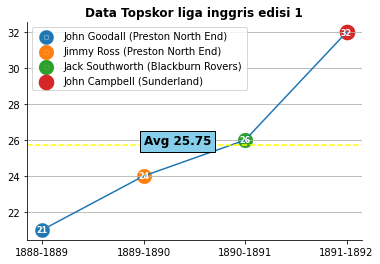

In [4]:
#1. visualisasi data topskor

#- set fig and axes with param ax
fig, ax = pyplot.subplots(figsize=(6,4))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.grid(axis='y')

ax.set_title('Data Topskor liga inggris edisi 1',fontweight='bold')

average = sum(edisi1['Jumlah gol']) / len(edisi1)

# add scatter to ax
for i in edisi1.index:
    data = edisi1[edisi1['Juara'].index == i]
    
    player = data['Pencetak gol terbanyak'].str.split('(',n=1,expand=True)
    
    # ternary
    juara = '*' if player[1].tolist()[0] == data['Juara'].tolist()[0]+')' else ''
    
    ax.scatter(i,data['Jumlah gol'],linewidth=10,label=data['Pencetak gol terbanyak'].tolist()[0],s=data['Jumlah gol'].tolist()[0])
    ax.text(i,data['Jumlah gol'].tolist()[0],data['Jumlah gol'].tolist()[0],fontsize=8,fontweight='bold',horizontalalignment='center',verticalalignment='center',color='white')
    #ax.text(i,19,data['Juara'].tolist()[0],fontsize=8,fontweight='bold',horizontalalignment='center',verticalalignment='center')
    
# add plot to ax
ax.plot(edisi1.index,edisi1['Jumlah gol'])

# add line horizontal to average to ax
ax.axhline(average,color='yellow',linestyle='--')
ax.text('1889-1890',average,'Avg '+str(average),fontweight='bold',fontsize=12,bbox=dict(facecolor='skyblue'),horizontalalignment='left')

# add legend to ax
ax.legend(bbox_to_anchor=(0,1,1,0))

pyplot.show()

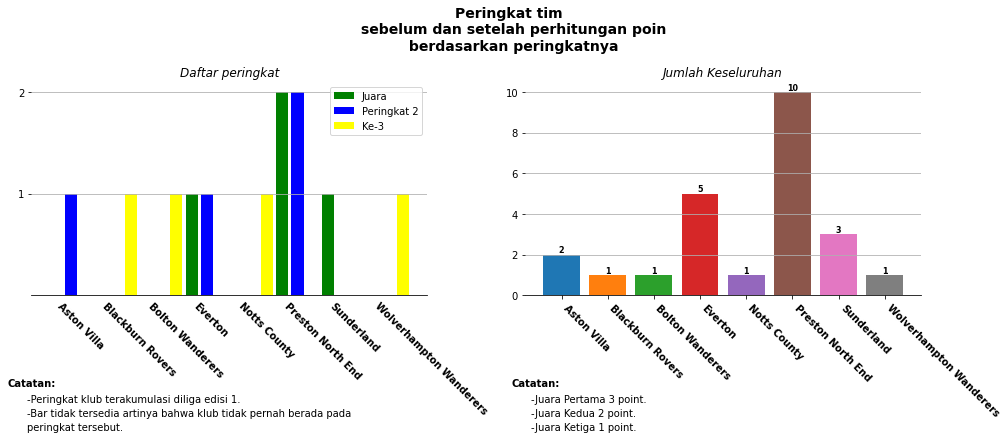

In [5]:
#2 visualisasi

##-set data 
dataJuara = edisi1['Juara'].value_counts()
dataRunner = edisi1['Peringkat kedua'].value_counts()
dataKetiga = edisi1['Ke-3'].value_counts()

datahist = pd.concat([dataJuara,dataRunner,dataKetiga],axis=1)
datahist = pd.DataFrame(datahist.fillna(0),dtype='int64')

datahist = datahist.sort_index().T

tim = {}
jumlahdata = len(datahist)

# create fig and two axes with param ax, ax1 (1,2)
fig, (ax,ax2) = pyplot.subplots(1,2,figsize=(14,6),tight_layout = True)
fig.suptitle('Peringkat tim \n sebelum dan setelah perhitungan poin\n berdasarkan peringkatnya',fontweight='bold',fontsize=14)

#- set ax 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.grid(axis='y')
ax.set_title('Daftar peringkat',fontstyle='italic')

ax.yaxis.set_ticks([1,2,3])
ax.xaxis.set_ticks(range(24))

##- add bar to ax from data hist
for i,values in datahist.items():
    colorBar = ['green','Blue','Yellow']
    count = 0
    
    tim[i] = []
    for j,v in values.items():
        ax.bar(j+' '+i,v,color=colorBar[count])
               
        # v = jumlah peringkat yang yg diproleh keseluruhan
        # count -> peringkatnya klub : 0-juara, 1=kedua, 2=ketiga,
        # jumlah peringkat = 3
        
        peringkat = jumlahdata - count
        
        #print(i+' '+j+'='+str(v)+' '+str(count)+' val peringkat '+str(peringkat))
        
        tim[i].append(v*peringkat)
        
        if count == 0:
            label = ax.text(j+' '+i,-0.05,i,fontweight='bold',rotation=-45,horizontalalignment='left',verticalalignment='top')
        count+=1

##- set ax after add data
ax.xaxis.set_visible(False)

# add legend to ax
ax.legend(bbox_to_anchor=(0,1,1,0),labels=['Juara','Peringkat 2','Ke-3'])

#- set ax2
ax2.set_title('Jumlah Keseluruhan',fontstyle='italic')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.grid(axis='y')

#- data
datatim = pd.DataFrame(tim,index = ['Juara','Kedua','Ketiga'])
#print(datatim.sum())

##- add bar
for i,v in datatim.sum().items():
    #print(i)
    ax2.bar(i,v)
    ax2.text(i,v,v,fontsize=8,fontweight='bold',horizontalalignment='center',verticalalignment='bottom')

#-set ax2 after add data
label = ax2.xaxis.get_ticklabels()
pyplot.setp(label,fontweight='bold',rotation=-45,horizontalalignment='left',verticalalignment='top')

#- add text to figure
fig.text(0,0.1,'Catatan:',clip_on=True,fontweight='bold')
fig.text(0.02,0,'-Peringkat klub terakumulasi diliga edisi 1.\n-Bar tidak tersedia artinya bahwa klub tidak pernah berada pada \nperingkat tersebut.',linespacing=1.5,clip_on=True)

fig.text(0.5,0.1,'Catatan:',clip_on=True,fontweight='bold')
fig.text(0.52,0,'-Juara Pertama 3 point. \n-Juara Kedua 2 point. \n-Juara Ketiga 1 point.',linespacing=1.5,clip_on=True)
    
pyplot.show()

### Data Edisi 2 1892  - 1992

In [6]:
#-showing data edisi 2

print('DATA EDISI 2')
display(edisi2)

print('\nDATA EDISI 2 DENGAN JUARA TERBANYAK\n')
display(edisi2['Juara'].value_counts().sort_values(ascending=False))

print('\nTOP SKOR EDISI 2\n')
display(edisi2[['Pencetak gol terbanyak','Jumlah gol','Juara']].sort_values('Jumlah gol',ascending=False))

print('\nSTATISTIK EDISI 2\n')
display(edisi2.describe())

juara_tahun2 = pd.DataFrame(edisi2['Juara'].value_counts().values,
                           columns=['Jumlah'],
                           index=edisi2['Juara'].value_counts().index)

juara_tahun2['Tahun juara'] = pd.Series(tahun_juara(edisi2['Juara']))

display(juara_tahun2)

# pake lambda
print('DATA EDISI 2 dengan beberapa setingan')
edisi2[edisi2.index == '1947-48']

DATA EDISI 2


,Juara,Peringkat kedua,Ke-3,Pencetak gol terbanyak,Jumlah gol
Tahun,,,,,
1892-1893,Sunderland,Preston North End,Everton,John Campbell (Sunderland),31
1893-1894,Aston Villa,Sunderland,Derby County,Jack Southworth (Everton),27
1894-1895,Sunderland,Everton,Aston Villa,John Campbell (Sunderland),22
1895-1896,Aston Villa,Derby County,Everton,Johnny Campbell (Aston Villa) Steve Bloomer (Derby County),20
1896-1897,Aston Villa,Sheffield United,Derby County,Steve Bloomer (Derby County),22
...,...,...,...,...,...
1987-88,Liverpool,Manchester United,Nottingham Forest,John Aldridge (Liverpool),26
1988-89,Arsenal,Liverpool,Nottingham Forest,Alan Smith (Arsenal),23
1989-90,Liverpool,Aston Villa,Tottenham Hotspur,Gary Lineker (Tottenham Hotspur),24



DATA EDISI 2 DENGAN JUARA TERBANYAK



Liverpool                                                                       18
Arsenal                                                                         10
Everton                                                                          8
Aston Villa                                                                      7
Manchester United                                                                7
Sunderland                                                                       5
Newcastle United                                                                 4
Leeds United                                                                     3
The Wednesday                                                                    3
Wolverhampton Wanderers                                                          3
Huddersfield Town                                                                3
Tottenham Hotspur                                                                2
Burn


TOP SKOR EDISI 2



,Pencetak gol terbanyak,Jumlah gol,Juara
Tahun,,,
1927-28,Dixie Dean (Everton),60,Everton
1930-31,Tom Waring (Aston Villa),49,Arsenal
1931-32,Dixie Dean (Everton),44,Everton
1928-29,Dave Halliday (Sunderland),43,The Wednesday
1925-26,Ted Harper (Blackburn Rovers),43,Huddersfield Town
...,...,...,...
1980-81,Peter Withe (Aston Villa) Steve Archibald (Tottenham Hotspur),20,Aston Villa
1901-02,Jimmy Settle (Everton),18,Sunderland
1940/41-1945/46,Ditiadakan karena Perang Dunia Kedua,0,Ditiadakan karena Perang Dunia Kedua



STATISTIK EDISI 2



,Jumlah gol
count,92.000000
mean,29.250000
std,8.892057
min,0.000000
25%,24.750000
50%,29.000000
75%,33.250000
max,60.000000


,Jumlah,Tahun juara
Liverpool,18,1900-01 1905-06 1921-22 1922-23 1946-47 1963-64 1965-66 1972-73 1975-76 1976-77 1978-79 1979-80 1981-82 1982-83 1983-84 1985-86 1987-88 1989-90
Arsenal,10,1930-31 1932-33 1933-34 1934-35 1937-38 1947-48 1952-53 1970-71 1988-89 1990-91
Everton,8,1914-15 1927-28 1931-32 1938-39 1962-63 1969-70 1984-85 1986-87
Aston Villa,7,1893-1894 1895-1896 1896-1897 1898-1899 1899-1900 1909-10 1980-81
Manchester United,7,1907-08 1910-11 1951-52 1955-56 1956-57 1964-65 1966-67
Sunderland,5,1892-1893 1894-1895 1901-02 1912-13 1935-36
Newcastle United,4,1904-05 1906-07 1908-09 1926-27
Leeds United,3,1968-69 1973-74 1991-92
The Wednesday,3,1902-03 1903-04 1928-29
Wolverhampton Wanderers,3,1953-54 1957-58 1958-59


DATA EDISI 2 dengan beberapa setingan


,Juara,Peringkat kedua,Ke-3,Pencetak gol terbanyak,Jumlah gol
Tahun,,,,,
1947-48,Arsenal,Manchester United,Burnley,Ronnie Rooke (Arsenal),33


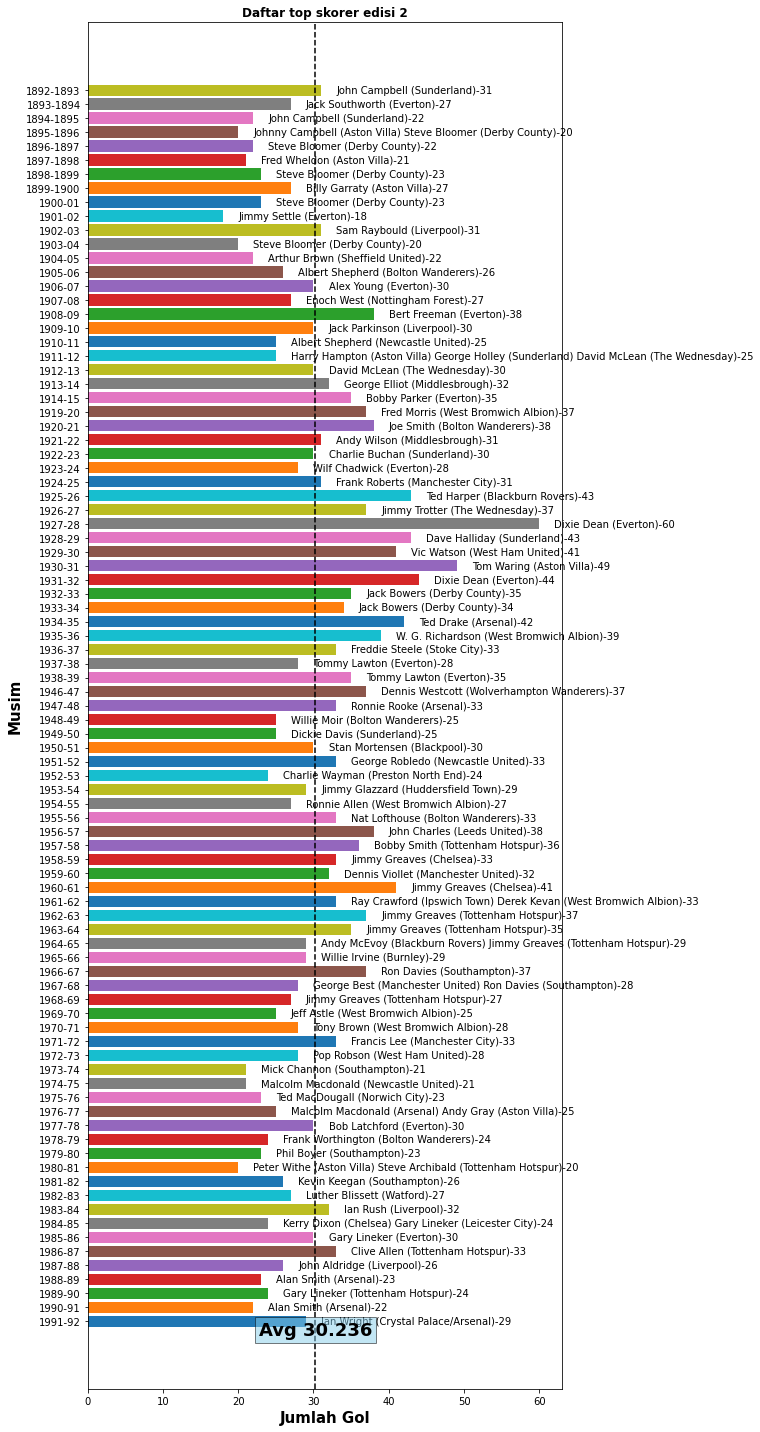

In [7]:
#1 Visualisasi edisi 2 topskorer

# set data
edisitesting = edisi2.copy()

edisi2 = edisitesting[edisitesting['Jumlah gol'] != 0].sort_index(ascending = False)

average = round(sum(edisi2['Jumlah gol']) / len(edisi2),4)
count = 0

# create figure and axes with param ax
fig, ax = pyplot.subplots(figsize=(10,20),tight_layout=True)

# set ax
ax.set_title('Daftar top skorer edisi 2',fontweight='bold')
ax.set_ylabel('Musim',fontsize=15,fontweight='bold')
ax.set_xlabel('Jumlah Gol',fontsize=15,fontweight='bold')

#- add barh and text to ax
for i in edisi2.index:
    data = edisi2[edisi2['Juara'].index == i]
    ax.barh(i,data['Jumlah gol'].tolist())
    
    #- gol
    ax.text(data['Jumlah gol']+2,i,data['Pencetak gol terbanyak'].tolist()[0]+'-'+str(data['Jumlah gol'].tolist()[0]),
           verticalalignment='center',horizontalalignment='left')
    
    #- name player
    #ax.text(0,i+'('+data['Juara'].tolist()[0]+') ',data['Pencetak gol terbanyak'].tolist()[0],
    #       verticalalignment='center',horizontalalignment='left',color='white')
    
    #- nilai tengah
    if count == 0:
        ax.text(average,i,'Avg '+str(average),fontsize=18,fontweight='bold',verticalalignment='top',horizontalalignment='center',
                bbox=dict(facecolor='skyblue',alpha=0.5))
    
    count = count + 1

#- add line vertical
ax.axvline(average,linestyle='--',color='black')

#ax.legend(loc=(1),fontsize=7)

#pyplot.setp(label,rotation=45)
pyplot.show()

In [8]:
# splitting data with 2 char, line='outline',inline
def splitting_2_char(series,char={ 'first':'(', 'last':')' },index_get=False,other_series=pd.Series([]),line='all'):
    
    save = []
    series = series.str.split(char['last'])
    series_last = series.str.split(char['last'])
    
    for i,val in series.items():
        val.pop()
        for v in val:
            savesub = []
            
            # index
            if index_get:
                savesub.append(i)
            
            data = other_series.loc[other_series.index == i]
            first = v.lstrip().split(char['first'])[0].rstrip() # outline
            last =  v.lstrip().split(char['first'])[1] # inline
            
            # out in splitting
            if line == 'outline':
                savesub.append(first)
            elif line == 'inline':
                savesub.append(last)
            else:
                savesub.append(first)
                savesub.append(last)
            
            #print(len(series.index.tolist()))
            #print(len(other_series.index.tolist()))
            
            if other_series.index.tolist() == series.index.tolist():
                #print('tes')
                savesub.append(data.values[0])
            
        save.append(savesub)
        
    return save

#- set data
pencetak = splitting_2_char(edisi2['Pencetak gol terbanyak'],index_get=True,other_series=edisi2['Jumlah gol'])

print(pencetak)

#-set dataframe dari array pencetak
datapemain = pd.DataFrame(pencetak,columns=['Tahun','Nama','Klub','Jumlah gol'])

#-set series pemain topskor lebih dr sekali.
datapemainlebih1 = datapemain['Nama'].value_counts().sort_index()
datapemainlebih1 = datapemainlebih1.loc[datapemainlebih1.values > 1]

listpemainlebih1 = datapemainlebih1.index.tolist()


#-set series jumlah golnya
datagoltopskorer = datapemain[['Tahun','Nama','Jumlah gol']].loc[datapemain['Nama'].isin(listpemainlebih1)].sort_values('Tahun')
#print(datagoltopskorer)

#-dicti topskorer pemain
pemainmap = tahun_juara(datapemain['Nama'],datapemain['Tahun'])


display(datapemain)

display(datagoltopskorer)

display(pemainmap)


[['1991-92', 'Ian Wright', 'Crystal Palace/Arsenal', 29], ['1990-91', 'Alan Smith', 'Arsenal', 22], ['1989-90', 'Gary Lineker', 'Tottenham Hotspur', 24], ['1988-89', 'Alan Smith', 'Arsenal', 23], ['1987-88', 'John Aldridge', 'Liverpool', 26], ['1986-87', 'Clive Allen', 'Tottenham Hotspur', 33], ['1985-86', 'Gary Lineker', 'Everton', 30], ['1984-85', 'Gary Lineker', 'Leicester City', 24], ['1983-84', 'Ian Rush', 'Liverpool', 32], ['1982-83', 'Luther Blissett', 'Watford', 27], ['1981-82', 'Kevin Keegan', 'Southampton', 26], ['1980-81', 'Steve Archibald', 'Tottenham Hotspur', 20], ['1979-80', 'Phil Boyer', 'Southampton', 23], ['1978-79', 'Frank Worthington', 'Bolton Wanderers', 24], ['1977-78', 'Bob Latchford', 'Everton', 30], ['1976-77', 'Andy Gray', 'Aston Villa', 25], ['1975-76', 'Ted MacDougall', 'Norwich City', 23], ['1974-75', 'Malcolm Macdonald', 'Newcastle United', 21], ['1973-74', 'Mick Channon', 'Southampton', 21], ['1972-73', 'Pop Robson', 'West Ham United', 28], ['1971-72', 'F

c:\users\irwan\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


,Tahun,Nama,Klub,Jumlah gol
0,1991-92,Ian Wright,Crystal Palace/Arsenal,29
1,1990-91,Alan Smith,Arsenal,22
2,1989-90,Gary Lineker,Tottenham Hotspur,24
3,1988-89,Alan Smith,Arsenal,23
4,1987-88,John Aldridge,Liverpool,26
...,...,...,...,...
84,1896-1897,Steve Bloomer,Derby County,22
85,1895-1896,Steve Bloomer,Derby County,20
86,1894-1895,John Campbell,Sunderland,22
87,1893-1894,Jack Southworth,Everton,27


,Tahun,Nama,Jumlah gol
88,1892-1893,John Campbell,31
86,1894-1895,John Campbell,22
85,1895-1896,Steve Bloomer,20
84,1896-1897,Steve Bloomer,22
82,1898-1899,Steve Bloomer,23
80,1900-01,Steve Bloomer,23
77,1903-04,Steve Bloomer,20
75,1905-06,Albert Shepherd,26
70,1910-11,Albert Shepherd,25
69,1911-12,David McLean,25


{'Ian Wright': '1991-92',
 'Alan Smith': '1990-91 1988-89',
 'Gary Lineker': '1989-90 1985-86 1984-85',
 'John Aldridge': '1987-88',
 'Clive Allen': '1986-87',
 'Ian Rush': '1983-84',
 'Luther Blissett': '1982-83',
 'Kevin Keegan': '1981-82',
 'Steve Archibald': '1980-81',
 'Phil Boyer': '1979-80',
 'Frank Worthington': '1978-79',
 'Bob Latchford': '1977-78',
 'Andy Gray': '1976-77',
 'Ted MacDougall': '1975-76',
 'Malcolm Macdonald': '1974-75',
 'Mick Channon': '1973-74',
 'Pop Robson': '1972-73',
 'Francis Lee': '1971-72',
 'Tony Brown': '1970-71',
 'Jeff Astle': '1969-70',
 'Jimmy Greaves': '1968-69 1964-65 1963-64 1962-63 1960-61 1958-59',
 'Ron Davies': '1967-68 1966-67',
 'Willie Irvine': '1965-66',
 'Derek Kevan': '1961-62',
 'Dennis Viollet': '1959-60',
 'Bobby Smith': '1957-58',
 'John Charles': '1956-57',
 'Nat Lofthouse': '1955-56',
 'Ronnie Allen': '1954-55',
 'Jimmy Glazzard': '1953-54',
 'Charlie Wayman': '1952-53',
 'George Robledo': '1951-52',
 'Stan Mortensen': '1950-5

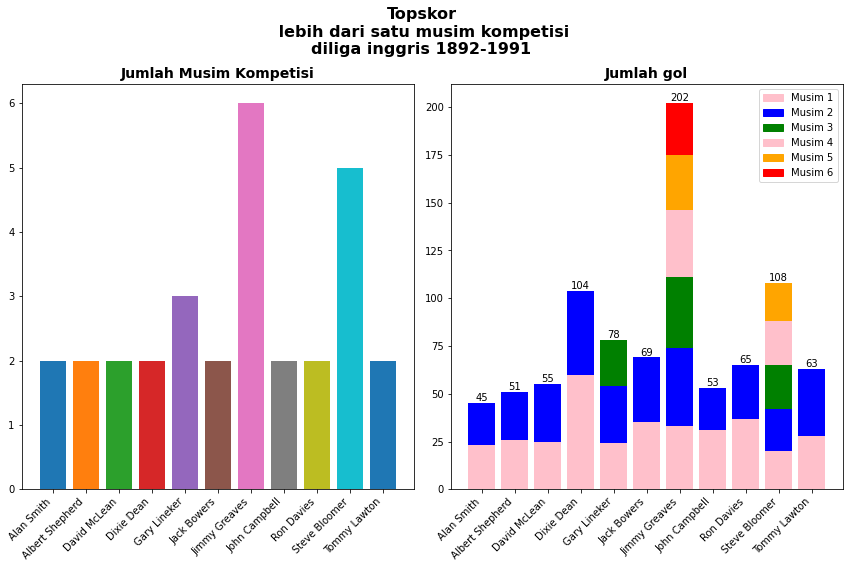

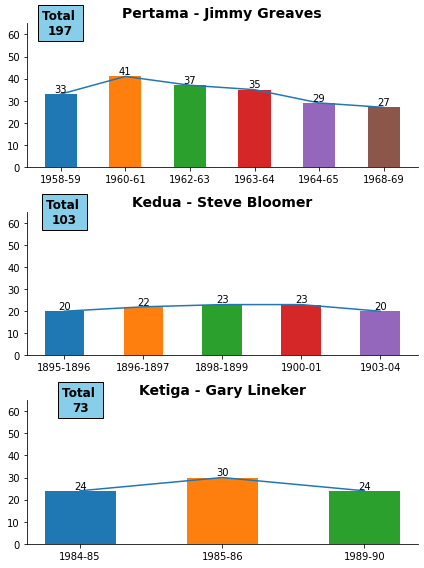

In [9]:
#-2 Visualisasi
import matplotlib.colors as mc
import matplotlib.patches as mp


#- create fig and (ax, ax2)
fig, (ax,ax2) = pyplot.subplots(1,2,figsize=(12,8),tight_layout=True)
fig.suptitle('Topskor\n lebih dari satu musim kompetisi\ndiliga inggris 1892-1991',fontweight='bold',fontsize=16)

#- set ax1
ax.set_title('Jumlah Musim Kompetisi',fontweight='bold',fontsize=14)

#-add bar
for i,v in datapemainlebih1.items():
    ax.bar(i,v)

#-set after add
label = ax.xaxis.get_ticklabels()
pyplot.setp(label,rotation = 45,horizontalalignment='right')

#-set ax2
ax2.set_title('Jumlah gol',fontweight='bold',fontsize=14)
#colorselect = np.random.choice(list(mc.BASE_COLORS),len(listpemainlebih1))
colorr = ['b','g','y','r','orange','brown','pink','purple']
colorselect = np.random.choice(colorr,len(listpemainlebih1))
colorlegend = np.random.choice(colorr,datapemainlebih1.max())

#- list pemain
for i in listpemainlebih1:
    count = 0
    datagol = datagoltopskorer[datagoltopskorer['Nama'] == i]
    
    bottom = 0
    
    #-add stackbar to ax2
    for j in datagol.index:
        datagoldupli = datagol[datagol.index == j]
        ax2.bar(i,datagoldupli['Jumlah gol'].values[0],bottom = bottom,color=colorselect[count])
        #ax2.text(i,bottom,datagoldupli['Jumlah gol'].values[0],horizontalalignment='center',verticalalignment='bottom',color='white')
        
        bottom += datagoldupli['Jumlah gol'].values[0]
        count += 1
        
        #print(datagoldupli['Jumlah gol'].values[0])
    
    ax2.text(i,datagol['Jumlah gol'].sum(),datagol['Jumlah gol'].sum(),horizontalalignment='center',verticalalignment='bottom')

#-set after add
#legend = range(1,datapemainlebih1.max()+1)
legend = []

for i in range(0,len(colorlegend)):
    legend.append(mp.Patch(color=colorselect[i],label='Musim '+str(i+1)))

ax2.legend(handles=legend)
label = ax2.xaxis.get_ticklabels()
pyplot.setp(label,rotation = 45,horizontalalignment='right')

#-visualisasi rank detail pemain
fig2 = pyplot.figure(tight_layout=True,figsize=(6,8))

gs = fig2.add_gridspec(3,1)

axgroup = []

#-ax1
axcenter1 = fig2.add_subplot(gs[0,0])
axcenter1.set_title('Pertama',fontweight='bold',fontsize=14)
axgroup.append(axcenter1)

#-ax2
axcenter2 = fig2.add_subplot(gs[1,0])
axcenter2.set_title('Kedua',fontweight='bold',fontsize=14)
axgroup.append(axcenter2)

#-ax3
axcenter3 = fig2.add_subplot(gs[2,0])
axcenter3.set_title('Ketiga',fontweight='bold',fontsize=14)
axgroup.append(axcenter3)

#-add data to axes
count = 0
for i,v in datapemainlebih1.sort_values(ascending=False).head(3).items():
    datadetail = datagoltopskorer[datagoltopskorer['Nama'] == i]
    #print(datadetail)
    axgroup[count].set_title(axgroup[count].get_title()+' - '+i,fontweight='bold',fontsize=14)
    axgroup[count].set_ylim(0,(datapemain['Jumlah gol'].max()-(datapemain['Jumlah gol'].max() % 5)) + 5)
    border = axgroup[count].spines
    border['top'].set_visible(False)
    border['right'].set_visible(False)
    
    axgroup[count].text(0,datapemain['Jumlah gol'].max(),'Total \n'+str(datadetail['Jumlah gol'].sum() - 5),fontweight='bold',fontsize=12,
                        bbox=dict(facecolor='skyblue'),horizontalalignment='center')
    
    for j in datadetail.index:
        datadetaildetail = datadetail[datadetail.index == j]
        axgroup[count].bar(datadetaildetail['Tahun'],datadetaildetail['Jumlah gol'],width=0.5)
        #axgroup[count].scatter(datadetaildetail['Tahun'],datadetaildetail['Jumlah gol'])
        
        axgroup[count].text(datadetaildetail['Tahun'],datadetaildetail['Jumlah gol'],datadetaildetail['Jumlah gol'].values[0],horizontalalignment='center',verticalalignment='bottom')
    
    axgroup[count].plot(pd.Series(datadetail['Jumlah gol'].tolist(),index=datadetail['Tahun']).tolist())
    #print(datadetail[['Tahun','Jumlah gol']])
    count+=1
        

pyplot.show()

### Edisi 3 tahun 1993 - sekarang

In [10]:
#- Showing data edisi3
print('DATA EDISI 3\n')
display(edisi3)

print('\nDATA EDISI 3 DENGAN JUARA TERBANYAK\n')
display(edisi3['Juara'].value_counts().sort_values(ascending=False))

print('\nTOP SKORER TERBANYAK\n')
display(edisi3[['Pencetak gol terbanyak','Jumlah gol','Juara']].sort_values('Jumlah gol',ascending=False))

print('\nSTATISTIK GOL\n')
display(edisi3['Jumlah gol'].describe())

juara_tahun3 = pd.DataFrame(edisi3['Juara'].value_counts().values,
                           columns=['Jumlah'],
                           index=edisi3['Juara'].value_counts().index)

juara_tahun3['Tahun juara'] = pd.Series(tahun_juara(edisi3['Juara']))

display(juara_tahun3)

DATA EDISI 3



,Juara,Peringkat kedua,Ke-3,Pencetak gol terbanyak,Jumlah gol
Tahun,,,,,
1992-1993,Manchester United,Aston Villa,Norwich City,Teddy Sheringham (Nottingham Forest/Tottenham Hotspur),22
1993-1994,Manchester United,Blackburn Rovers,Newcastle United,Andrew Cole (Newcastle United),34
1994-1995,Blackburn Rovers,Manchester United,Nottingham Forest,Alan Shearer (Blackburn Rovers),34
1995-1996,Manchester United,Newcastle United,Liverpool,Alan Shearer (Blackburn Rovers),31
1996-1997,Manchester United,Newcastle United,Arsenal,Alan Shearer (Newcastle United),25
1997-1998,Arsenal,Manchester United,Liverpool,Chris Sutton (Blackburn Rovers) Dion Dublin (Coventry City) Michael Owen (Liverpool),18
1998-1999,Manchester United,Arsenal,Chelsea,Jimmy Floyd Hasselbaink (Leeds United) Michael Owen (Liverpool) Dwight Yorke (Manchester United),18
1999-2000,Manchester United,Arsenal,Leeds United,Kevin Phillips (Sunderland),30
2000-2001,Manchester United,Arsenal,Liverpool,Jimmy Floyd Hasselbaink (Chelsea),23



DATA EDISI 3 DENGAN JUARA TERBANYAK



Manchester United    13
Manchester City       5
Chelsea               5
Arsenal               3
Leicester City        1
Blackburn Rovers      1
Liverpool             1
Name: Juara, dtype: int64


TOP SKORER TERBANYAK



,Pencetak gol terbanyak,Jumlah gol,Juara
Tahun,,,
1994-1995,Alan Shearer (Blackburn Rovers),34,Blackburn Rovers
1993-1994,Andrew Cole (Newcastle United),34,Manchester United
2017-2018,Mohamed Salah (Liverpool),32,Manchester City
1995-1996,Alan Shearer (Blackburn Rovers),31,Manchester United
2013-2014,Luis SuÃ¡rez (Liverpool),31,Manchester City
2007-2008,Cristiano Ronaldo (Manchester United),31,Manchester United
2003-2004,Thierry Henry (Arsenal),30,Arsenal
2011-2012,Robin van Persie (Arsenal),30,Manchester City
1999-2000,Kevin Phillips (Sunderland),30,Manchester United



STATISTIK GOL



count    29.000000
mean     25.931034
std       4.712681
min      18.000000
25%      23.000000
50%      25.000000
75%      30.000000
max      34.000000
Name: Jumlah gol, dtype: float64

,Jumlah,Tahun juara
Manchester United,13,1992-1993 1993-1994 1995-1996 1996-1997 1998-1999 1999-2000 2000-2001 2002-2003 2006-2007 2007-2008 2008-2009 2010-2011 2012-2013
Chelsea,5,2004-2005 2005-2006 2009-2010 2014-2015 2016-2017
Manchester City,5,2011-2012 2013-2014 2017-2018 2018-2019 2020-2021
Arsenal,3,1997-1998 2001-2002 2003-2004
Liverpool,1,2019-2020
Blackburn Rovers,1,1994-1995
Leicester City,1,2015-2016


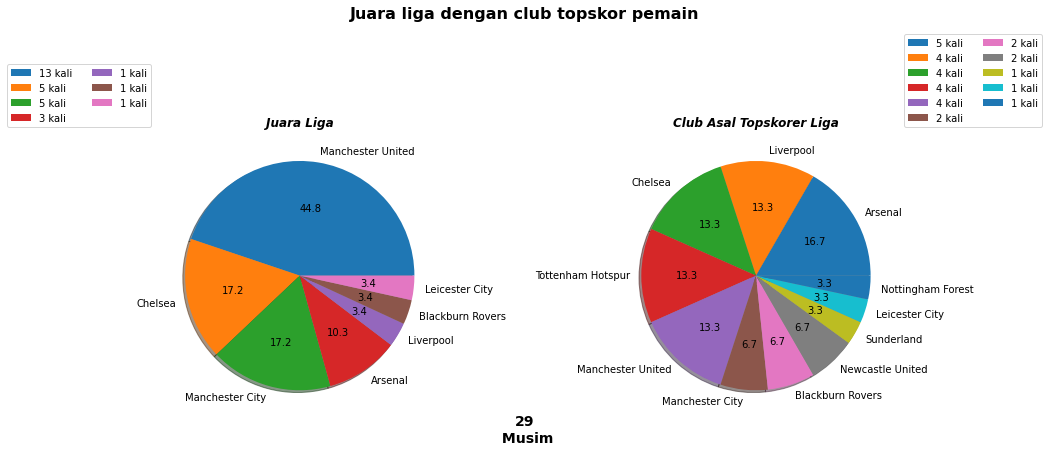

In [11]:
pencetak = pd.DataFrame(splitting_2_char(edisi3['Pencetak gol terbanyak']),columns=['Nama','Club'])

# expand = create dataframe
#regex str.split(r'\+|=')
club_pencetak = pencetak['Club'].str.split('/',expand=True)
d = []

# out data club
for i,valu in club_pencetak.items():
    
    for j in valu:
        if(j != None):
            #print(type(j))
            d.append(j)

club_pencetak = pd.Series(d)
#print(club_pencetak.value_counts())

#1 Visualisasi
fig, (ax,ax2) = pyplot.subplots(1,2,figsize=(15,6),tight_layout=True)
fig.suptitle('Juara liga dengan club topskor pemain',fontweight='bold',fontsize=16)

fig.text(0.5,0,str(len(edisi3))+'\n Musim',horizontalalignment='center',verticalalignment='center',
       fontsize=14,fontweight='bold')

#- ax -- juara liga terbanyak

#- set data
value = edisi3['Juara'].value_counts().values
label = edisi3['Juara'].value_counts().index.tolist()
val = edisi3['Juara'].value_counts().values.tolist()

labelfull = []
for l in range(0,len(label)):
    labelfull.append(label[l]+'\n'+str(val[l]))

ax.set_title('Juara Liga',fontstyle='italic',fontweight='bold')
ax.pie(value,labels = label,autopct='%1.1f',shadow=True)
ax.legend(labels=[str(v)+' kali' for v in val],ncol=2,bbox_to_anchor=(0,1),loc='lower right')

#- ax2- club asal topskor
valuetop = club_pencetak.value_counts().values
labeltop = club_pencetak.value_counts().index.tolist()
labeltopfull = []

for l in range(0,len(labeltop)):
    labeltopfull.append(labeltop[l]+'\n'+str(valuetop.tolist()[l]))

ax2.set_title('Club Asal Topskorer Liga',fontstyle='italic',fontweight='bold')
ax2.pie(valuetop,labels = labeltop,autopct='%1.1f',shadow=True)
ax2.legend(labels=[str(v)+' kali' for v in valuetop.tolist()],ncol=2,bbox_to_anchor=(1,1),loc='lower left')

pyplot.show()

### Customing liga inggris

In [12]:
print('DATA GABUNGAN\n')
display(edisigabungan)

print('\nDATA GABUNGAN DENGAN JUARA TERBANYAK\n')
display(edisigabungan['Juara'].value_counts().sort_values(ascending=False).head(15))

print('\nTOP SKORER TERBANYAK\n')
display(edisigabungan[['Juara','Pencetak gol terbanyak','Jumlah gol']].sort_values('Jumlah gol',ascending=False).head(15))


juara_tahungabung = pd.DataFrame(edisigabungan['Juara'].value_counts().values,
                           columns=['Jumlah'],
                           index=edisigabungan['Juara'].value_counts().index)

juara_tahungabung['Tahun juara'] = pd.Series(tahun_juara(edisigabungan['Juara']))

display(juara_tahungabung)

DATA GABUNGAN



,Juara,Peringkat kedua,Ke-3,Pencetak gol terbanyak,Jumlah gol
Tahun,,,,,
1888-1889,Preston North End,Aston Villa,Wolverhampton Wanderers,John Goodall (Preston North End),21
1889-1890,Preston North End,Everton,Blackburn Rovers,Jimmy Ross (Preston North End),24
1890-1891,Everton,Preston North End,Notts County,Jack Southworth (Blackburn Rovers),26
1891-1892,Sunderland,Preston North End,Bolton Wanderers,John Campbell (Sunderland),32
1892-1893,Sunderland,Preston North End,Everton,John Campbell (Sunderland),31
...,...,...,...,...,...
2016-2017,Chelsea,Tottenham Hotspur,Manchester City,Harry Kane (Tottenham Hotspur),29
2017-2018,Manchester City,Manchester United,Tottenham Hotspur,Mohamed Salah (Liverpool),32
2018-2019,Manchester City,Liverpool,Chelsea,Pierre-Emerick Aubameyang (Arsenal) Sadio ManÃ© (Liverpool) Mohamed Salah (Liverpool),22



DATA GABUNGAN DENGAN JUARA TERBANYAK



Manchester United          20
Liverpool                  19
Arsenal                    13
Everton                     9
Aston Villa                 7
Manchester City             7
Chelsea                     6
Sunderland                  6
Newcastle United            4
Wolverhampton Wanderers     3
Leeds United                3
Huddersfield Town           3
The Wednesday               3
Blackburn Rovers            3
Derby County                2
Name: Juara, dtype: int64


TOP SKORER TERBANYAK



,Juara,Pencetak gol terbanyak,Jumlah gol
Tahun,,,
1927-28,Everton,Dixie Dean (Everton),60
1930-31,Arsenal,Tom Waring (Aston Villa),49
1931-32,Everton,Dixie Dean (Everton),44
1925-26,Huddersfield Town,Ted Harper (Blackburn Rovers),43
1928-29,The Wednesday,Dave Halliday (Sunderland),43
1934-35,Arsenal,Ted Drake (Arsenal),42
1960-61,Tottenham Hotspur,Jimmy Greaves (Chelsea),41
1929-30,Sheffield Wednesday,Vic Watson (West Ham United),41
1935-36,Sunderland,W. G. Richardson (West Bromwich Albion),39


,Jumlah,Tahun juara
Manchester United,20,1907-08 1910-11 1951-52 1955-56 1956-57 1964-65 1966-67 1992-1993 1993-1994 1995-1996 1996-1997 1998-1999 1999-2000 2000-2001 2002-2003 2006-2007 ...
Liverpool,19,1900-01 1905-06 1921-22 1922-23 1946-47 1963-64 1965-66 1972-73 1975-76 1976-77 1978-79 1979-80 1981-82 1982-83 1983-84 1985-86 1987-88 1989-90 20...
Arsenal,13,1930-31 1932-33 1933-34 1934-35 1937-38 1947-48 1952-53 1970-71 1988-89 1990-91 1997-1998 2001-2002 2003-2004
Everton,9,1890-1891 1914-15 1927-28 1931-32 1938-39 1962-63 1969-70 1984-85 1986-87
Aston Villa,7,1893-1894 1895-1896 1896-1897 1898-1899 1899-1900 1909-10 1980-81
Manchester City,7,1936-37 1967-68 2011-2012 2013-2014 2017-2018 2018-2019 2020-2021
Chelsea,6,1954-55 2004-2005 2005-2006 2009-2010 2014-2015 2016-2017
Sunderland,6,1891-1892 1892-1893 1894-1895 1901-02 1912-13 1935-36
Newcastle United,4,1904-05 1906-07 1908-09 1926-27
Leeds United,3,1968-69 1973-74 1991-92


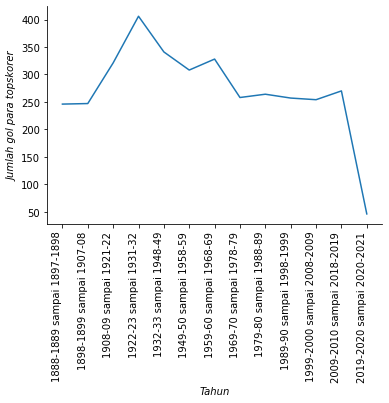

In [13]:
import matplotlib as mpl

# perbandingan jumlah gol topskorer setiap 10 tahun
edisigabungannotnull = edisigabungan[edisigabungan['Jumlah gol'] != 0]
#display(edisigabungannotnull)

# set data
batas = 10
jumlah_total = len(edisigabungannotnull)%batas + len(edisigabungannotnull)
pertamax = [i for i in range(0,jumlah_total,batas)]

data_perbatas = [edisigabungannotnull.iloc[i:i+10] for i in pertamax]
    
jumlah_gol = [ {'sum':i['Jumlah gol'].sum(),
                'min':i['Jumlah gol'].min(),
                'max':i['Jumlah gol'].max(),
                'tahun_awal':i.iloc[0].name,
                'tahun_terakhir':i.iloc[len(i)-1].name
               } 
              for i in data_perbatas]

jumlah_gol2 = [ i['Jumlah gol'].sum() for i in data_perbatas]
#print(jumlah_gol2)
tahun_jeda = [ i.iloc[0].name+' sampai '+i.iloc[len(i)-1].name for i in data_perbatas]
#print(tahun_jeda)


# visualisasi
fig, ax = pyplot.subplots()
ax.set_title('')

# set
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_ylabel('Jumlah gol para topskorer',fontstyle='italic')
ax.set_xlabel('Tahun',fontstyle='italic')

#fl = mpl.ticker.FixedLocator(jumlah_gol2)

# add artist
ax.plot(tahun_jeda,jumlah_gol2)

label = ax.get_xticklabels()
pyplot.setp(label,rotation=90,verticalalignment='top',horizontalalignment='right')

pyplot.show()

## Liga Jerman

In [14]:
datajerman = pd.read_html('exercise/Sepakbola/Jerman.html',index_col=0)


ligaawal = datajerman[1]

ligakedua = datajerman[3]

ligaketiga = datajerman[4]

ligakeempat = datajerman[5]

ligakelima = datajerman[7]

In [15]:
print('DATA EDISI 1\n')
display(ligaawal)

print('\nDATA EDISI 1 DENGAN JUARA TERBANYAK\n')
ligaawal['Juara'].value_counts().sort_values(ascending=False)

DATA EDISI 1



,Juara,Skor,Runner-up,Lokasi
Musim,,,,
1903,VfB Leipzig,7-2,Deutscher FC Prag,Altona
1904,Tidak ada juara,Tidak ada juara,Tidak ada juara,kassel
1905,Union 92 Berlin,2-0,Karlsruher FV,Köln
1906,VfB Leipzig,2-1,1. FC Pforzheim,Nürnberg
1907,Freiburger FC,3-1,Viktoria Berlin,Mannheim
1908,Viktoria Berlin,3-0,Penendang Stuttgarter,Berlin
1909,Phönix Karlsruhe,4-2,Viktoria Berlin,Breslau
1910,Karlsruher FV,1-0 ( et ),Holstein Kiel,Köln
1911,Viktoria Berlin,3-1,VfB Leipzig,Dresden



DATA EDISI 1 DENGAN JUARA TERBANYAK



1. FC Nurnberg                              5
SpVgg Furth                                 3
VfB Leipzig                                 3
Hertha BSC                                  2
Hamburger SV                                2
Viktoria Berlin                             2
Bayern Munich                               1
Karlsruher FV                               1
Holstein Kiel                               1
Phönix Karlsruhe                            1
Union 92 Berlin                             1
Tidak ada juara (gelar ditolak per DFB )    1
Tidak ada juara                             1
Ditangguhkan - Perang Dunia I               1
Freiburger FC                               1
Name: Juara, dtype: int64

In [74]:
# manipulasi data

# jumlah skor
ligaawalsplit = ligaawal['Skor'].str.split('(') # split dengan karakter (
cekvalidskor = ligaawalsplit.apply(lambda x: x[0].split('-')[0].isnumeric()) # cek apakah values sebuah nomor

ligaawalsplitnumeric = ligaawalsplit[cekvalidskor].apply(lambda x: x[0].split('-')) # last split dgn karakter '-'

ligaawaljumlahskor = ligaawalsplitnumeric.apply(lambda x: int(x[0]) + int(x[1].rstrip())) # jumlah skor

ligaawalskor = pd.DataFrame(np.array([ligaawalsplitnumeric.apply(lambda x: int(x[0])).tolist(), ligaawalsplitnumeric.apply(lambda x: int(x[1])).tolist()]).T,
                           index=ligaawaljumlahskor.index,columns=['Skor Juara','Skor Runner-up']) # dataframe liga awal dgn skor saja

# select data liga
ligaawalvalid = ligaawal[cekvalidskor] # dataframe yang sudah tervalidator
ligaawaljumlahskor = pd.concat([ligaawalvalid[['Juara','Runner-up']],ligaawalskor],axis=1) # join ligaawal dengan ligavalid

#display(ligaawaljumlahskor)

timJuara = ligaawaljumlahskor.groupby(['Juara']).sum() # get jumlah series dengan kolom juara

golKeseluruhan = pd.Series([v['Skor Juara'] + v['Skor Runner-up'] for i,v in timJuara.iterrows()],index=timJuara.index) # get jumlah gol keseluruhan
golKeseluruhan = golKeseluruhan.drop(index='Tidak ada juara (gelar ditolak per DFB )') # drop kolom tersebut
print(golKeseluruhan)
#ligaawalskor
#ligaawalvalid

Juara
1. FC Nurnberg      12
Bayern Munich        2
Freiburger FC        4
Hamburger SV        10
Hertha BSC          14
Holstein Kiel        1
Karlsruher FV        1
Phönix Karlsruhe     6
SpVgg Furth         15
Union 92 Berlin      2
VfB Leipzig         16
Viktoria Berlin      7
dtype: int64


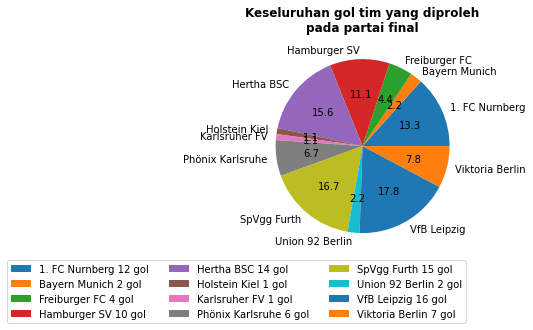

In [99]:
# visualisasi 11 november 2021
fig, ax = pyplot.subplots()
ax.set_title('Keseluruhan gol tim yang diproleh\npada partai final',fontweight='bold')

labelTim = golKeseluruhan.index.tolist()
valueTim = golKeseluruhan.tolist()

ax.pie(valueTim,labels=labelTim,autopct='%1.1f')
ax.legend(labels=[labelTim[i]+' '+str(valueTim[i])+' gol' for i in range(len(valueTim))],bbox_to_anchor=(1,0),ncol=3)

pyplot.show()

# end visualisasi
# line dibawah akan kearah menampilkan data saja

In [17]:
print('DATA EDISI 2\n')
display(ligakedua)

print('\nDATA EDISI 2 DENGAN JUARA TERBANYAK\n')
ligakedua['Juara'].value_counts().sort_values(ascending=False)

#


DATA EDISI 2



,Juara,Skor,Runner-up,Lokasi
Musim,,,,
1933,Fortuna Dusseldorf,3-0,Schalke 04,Köln
1934,Schalke 04,2-1,1. FC Nurnberg,Berlin
1935,Schalke 04,6-4,VfB Stuttgart,Köln
1936,1. FC Nurnberg,2-1 ( t ),Fortuna Dusseldorf,Berlin
1937,Schalke 04 †,2-0,1. FC Nurnberg,Berlin
1938,Hannover 96,3-3 ( aet ) 4-3 ( aet ),Schalke 04,Berlin
1939,Schalke 04,9-0,Admira Wien,Berlin
1940,Schalke 04,1-0,Dresdner SC,Berlin
1941,Wien cepat,4-3,Schalke 04,Berlin



DATA EDISI 2 DENGAN JUARA TERBANYAK



Schalke 04                        5
Dresdner SC                       2
Schalke 04 †                      1
Hannover 96                       1
1. FC Nurnberg                    1
Fortuna Dusseldorf                1
Wien cepat                        1
Ditangguhkan - Perang Dunia II    1
Name: Juara, dtype: int64

In [18]:
print('DATA EDISI 3\n')
display(ligaketiga)

print('\nDATA EDISI 3 DENGAN JUARA TERBANYAK\n')
ligaketiga['Juara'].value_counts().sort_values(ascending=False)

DATA EDISI 3



,Juara,Skor,Runner-up,Lokasi
Musim,,,,
1946-1947,Ditangguhkan - Hanya permainan regional pascaperang,Ditangguhkan - Hanya permainan regional pascaperang,Ditangguhkan - Hanya permainan regional pascaperang,Ditangguhkan - Hanya permainan regional pascaperang
1948,1. FC Nurnberg,2-1,1. FC Kaiserslautern,Köln
1949,VfR Mannheim,3-2 ( et ),Borussia Dortmund,Stuttgart
1950,VfB Stuttgart,2-1,Kickers Offenbach,Berlin
1951,1. FC Kaiserslautern,2-1,Preußen Münster,Berlin
1952,VfB Stuttgart,3-2,1. FC Saarbrücken,Ludwigshafen
1953,1. FC Kaiserslautern,4-1,VfB Stuttgart,Berlin
1954,Hannover 96,5-1,1. FC Kaiserslautern,Hamburg
1955,Rot-Weiss Essen,4-3,1. FC Kaiserslautern,Hannover



DATA EDISI 3 DENGAN JUARA TERBANYAK



Borussia Dortmund                                      3
VfB Stuttgart                                          2
1. FC Kaiserslautern                                   2
1. FC Nurnberg                                         2
Schalke 04                                             1
1. FC Köln                                             1
VfR Mannheim                                           1
Hannover 96                                            1
Eintracht Frankfurt                                    1
Rot-Weiss Essen                                        1
Hamburger SV                                           1
Ditangguhkan - Hanya permainan regional pascaperang    1
Name: Juara, dtype: int64

In [19]:
# jerman timur
print('DATA EDISI 4 Jerman Timur\n')
display(ligakeempat)

display(ligakeempat['Juara'].str.lstrip('('))

print('\nDATA EDISI 3 DENGAN JUARA TERBANYAK\n')
ligakeempat['Juara'].value_counts().sort_values(ascending=False)

DATA EDISI 4 Jerman Timur



,Juara,Juara ke dua,Posisi ketiga,Pencetak gol terbanyak (gol)
Musim,,,,
1948,SG Planitz (1),SG Freiimfelde Halle,—,—
1949,Aula Serikat ZSG (1),Fortuna Erfurt,—,—
1949-50,ZSG Horch Zwickau (2),Dresden Friedrichstadt,Waggonbau Dessau,Heinz Satrapa (23)
1950-51,BSG Chemie Leipzig (1),Erfurt Turbin,Motor Zwickau,Johannes Schone (37)
1951-52,Aula Turbin BSG (2),Volkspolizei Dresden,BSG Chemie Leipzig,Rudolf Krause (27)
1952-53,SG Dinamo Dresden (1),BSG Wismut Aue,MSG Motor Zwickau,Harry Arlt (26)
1953-54,Erfurt Turbin BSG (1),BSG Chemie Leipzig,SG Dinamo Dresden,Heinz Satrapa (21)
1954-55,Erfurt Turbin SC (2),SC Wismut Karl-Marx-Stadt,Rotasi SC Leipzig,Willy Troger (22)
1955,SC Wismut Karl-Marx-Stadt,SC Empor Rostock,SC Dinamo Berlin,Klaus Seligow (12)


Musim
1948                      SG Planitz (1)
1949                Aula Serikat ZSG (1)
1949-50            ZSG Horch Zwickau (2)
1950-51           BSG Chemie Leipzig (1)
1951-52              Aula Turbin BSG (2)
1952-53            SG Dinamo Dresden (1)
1953-54            Erfurt Turbin BSG (1)
1954-55             Erfurt Turbin SC (2)
1955           SC Wismut Karl-Marx-Stadt
1956       SC Wismut Karl-Marx-Stadt (1)
1957       SC Wismut Karl-Marx-Stadt (2)
1958             ASK Vorwarts Berlin (1)
1959       SC Wismut Karl-Marx-Stadt (3)
1960             ASK Vorwarts Berlin (2)
1961-62          ASK Vorwarts Berlin (3)
1962-63                SC Motor Jena (1)
1963-64           BSG Chemie Leipzig (2)
1964-65          ASK Vorwarts Berlin (4)
1965-66           FC Vorwarts Berlin (5)
1966-67           FC Karl-Marx-Stadt (1)
1967-68           FC Carl Zeiss Jena (2)
1968-69           FC Vorwarts Berlin (6)
1969-70           FC Carl Zeiss Jena (3)
1970-71               Dinamo Dresden (2)
1971-72   


DATA EDISI 3 DENGAN JUARA TERBANYAK



1. FC Magdeburg (2)              1
1. FC Magdeburg (1)              1
ZSG Horch Zwickau (2)            1
Dinamo Dresden (2)               1
SC Wismut Karl-Marx-Stadt (2)    1
Dinamo Dresden (8)               1
SC Wismut Karl-Marx-Stadt (1)    1
Aula Serikat ZSG (1)             1
Dinamo BFC (3)                   1
FC Karl-Marx-Stadt (1)           1
Dinamo Dresden (7)               1
SC Wismut Karl-Marx-Stadt        1
Dinamo Dresden (3)               1
1. FC Magdeburg (3)              1
Dinamo BFC (5)                   1
Dinamo BFC (1)                   1
FC Vorwarts Berlin (6)           1
Aula Turbin BSG (2)              1
ASK Vorwarts Berlin (4)          1
SG Planitz (1)                   1
Dinamo BFC (9)                   1
SC Wismut Karl-Marx-Stadt (3)    1
Dinamo BFC (6)                   1
Erfurt Turbin BSG (1)            1
SC Motor Jena (1)                1
FC Carl Zeiss Jena (2)           1
Dinamo BFC (8)                   1
FC Carl Zeiss Jena (3)           1
BSG Chemie Leipzig (

In [20]:
# jerman barat

print('DATA EDISI 5 Jerman Barat\n')
display(ligakelima)

print('\nDATA EDISI 5 DENGAN JUARA TERBANYAK\n')
ligakelima['Juara'].value_counts().sort_values(ascending=False)

DATA EDISI 5 Jerman Barat



,Juara,Runner-up,Tempat ketiga,Pencetak gol terbanyak,Gol
Musim,,,,,
1963-64,1. FC Köln,Meidericher SV,Eintracht Frankfurt,Uwe Seeler,30
1964-65,Werder Bremen,1. FC Köln,Borussia Dortmund,Rudi Brunnenmeier,24
1965-66,TSV 1860 Munich,Borussia Dortmund,Bayern Munich,Friedhelm Konietzka,26
1966-67,Eintracht Braunschweig,TSV 1860 Munich,Borussia Dortmund,"Lothar Emmerich ,Gerd Muller",28
1967-68,1. FC Nurnberg,Werder Bremen,Borussia Mönchengladbach,Hannes Löhr,27
1968-69,Bayern Munich †,Alemannia Aachen,Borussia Mönchengladbach,Gerd Muller,30
1969-70,Borussia Mönchengladbach,Bayern Munich,Hertha BSC,Gerd Muller,38
1970-71,Borussia Mönchengladbach,Bayern Munich,Hertha BSC,Lothar Kobluhn,24
1971-72,Bayern Munich,Schalke 04,Borussia Mönchengladbach,Gerd Muller,40



DATA EDISI 5 DENGAN JUARA TERBANYAK



Bayern Munich               17
Bayern Munich †             11
Borussia Mönchengladbach     5
Borussia Dortmund            4
Hamburger SV                 3
VfB Stuttgart                3
Werder Bremen                3
Bayern Munchen *             2
1. FC Kaiserslautern         2
1. FC Köln                   1
Werder Bremen †              1
Eintracht Braunschweig       1
1. FC Köln †                 1
1. FC Nurnberg               1
VfL Wolfsburg                1
Borussia Dortmund †          1
TSV 1860 Munich              1
Name: Juara, dtype: int64

## Liga Spanyol

In [21]:
dataspanyol = pd.read_html('exercise/Sepakbola/Spanyol.html',index_col=0)


ligaspanyol1 = dataspanyol[2]

In [22]:
ligaspanyol1

,Juara,Runner-up,Tempat ketiga,Pencetak gol terbanyak,Klub pencetak gol terbanyak,Gol
Musim,,,,,,
1929,Barcelona (1),Real Madrid (1),Athletic Bilbao,Paco Bienzobas,Sociedad Sejati,14
1929–30,Bilbao Atletik (1),Barcelona (1),Arena,Guillermo Gorostiza,Athletic Bilbao,19
1930–31,Bilbao Atletik (2),Balap Santander (1),Sociedad Sejati,bata,Athletic Bilbao,27
1931–32,Real Madrid (1),Bilbao Atletik (1),Barcelona,Guillermo Gorostiza,Athletic Bilbao,12
1932–33,Real Madrid (2),Bilbao Atletik (2),Spanyol,Manuel Olivares,Real Madrid,16
...,...,...,...,...,...,...
2016–17,Real Madrid (33),Barcelona (25),Atlético Madrid,Lionel Messi,Barcelona,37
2017–18,Barcelona (25),Atletico Madrid (9),Real Madrid,Lionel Messi,Barcelona,34
2018–19,Barcelona (26),Atletico Madrid (10),Real Madrid,Lionel Messi,Barcelona,36


## Liga italia

In [23]:
dataitalia = pd.read_html('exercise/Sepakbola/Italia.html',index_col=0)


ligaitali1 = dataitalia[2]

ligaitali2 = dataitalia[3]

ligaitali3 = dataitalia[4]

ligaitali4 = dataitalia[6]

In [24]:
ligaitali1

,Pemenang,Tempat kedua,/,Pencetak gol terbanyak (klub) (gol)
Tahun,,,,
1904,Genoa (6),Juventus,-,(Tidak dikenal)
Tahun,Pemenang,Tempat kedua,Posisi ketiga,Pencetak gol terbanyak (klub) (gol)
1905,Juventus (1),Genoa,Orang Milan AS,(Tidak dikenal)
1906,Milan (2),Juventus,Genoa,(Tidak dikenal)
1907,Milan (3),Torino,Andrea Doria,(Tidak dikenal)
1908,Pro Vercelli (1),Orang Milan AS,Andrea Doria,(Tidak dikenal)
1909,Pro Vercelli (2),Orang Milan AS,Genoa,(Tidak dikenal)
1909–10,internasional (1),Pro Vercelli,Juventus,(Tidak dikenal)
Musim,Pemenang,Juara Veneto-Emilia,/,Pencetak gol terbanyak (klub) (gol)


In [25]:
ligaitali2

,Pemenang,Juara Italia tengah-selatan,/,Pencetak gol terbanyak (klub) (gol)
Musim,,,,
1921–22 (CCI),Pro Vercelli (7),Fortitudo Roma,-,(Tidak dikenal)
1922–23,Genoa (8),Lazio,-,(Tidak dikenal)
1923–24,Genoa (9),Savoia,-,Heinrich Schonfeld (Torino) (22)
1924–25,Bologna (1),Alba Trastevere,-,Mario Magnozzi (Livorno) (19)
1925–26,Juventus (2),Alba Trastevere,-,Ferenc Hirzer (Juventus) (35)


In [26]:
ligaitali3

,Pemenang,Juara ke dua,Posisi ketiga,Pencetak gol terbanyak (klub) (gol)
Musim,,,,
1926–27,Tidak diberikan,Bologna,Juventus,Anton Powolny (Internazionale) (22)
1927–28,Torino (1),Genoa,Alessandria,Julio Libonatti (Torino) (35)
Musim,Pemenang,Tempat kedua,/,Pencetak gol terbanyak (klub) (gol)
1928–29,Bologna (2),Torino,-,Gino Rossetti (Torino) (36)


In [27]:
ligaitali4

,Pemenang,Juara ke dua,Posisi ketiga,Pencetak gol terbanyak (klub) (gol)
Musim,,,,
1929–30,Ambrosiana-Inter (3),Genoa,Juventus,Giuseppe Meazza (Ambrosiana-Inter) (31)
1930–31,Juventus (3),Roma,Bologna,Rodolfo Volk (Roma) (29)
1931–32,Juventus (4),Bologna,Roma,Pedro Petrone ( Fiorentina ) Angelo Schiavio (Bologna) (25)
1932–33,Juventus (5),Ambrosiana-Inter,Bologna/Napoli,Felice Placido Borel (Juventus) (29)
1933–34,Juventus (6),Ambrosiana-Inter,Napoli,Felice Placido Borel (Juventus) (31)
...,...,...,...,...
2016–17,Juventus (33),Roma,Napoli,Edin Džeko (Roma) (29)
2017–18,Juventus (34),Napoli,Roma,Mauro Icardi (Internazionale) Ciro Immobile (Lazio) (29)
2018–19,Juventus (35),Napoli,Atalanta,Fabio Quagliarella (Sampdoria) (26)


## Liga Prancis

In [28]:
dataprancis = pd.read_html('exercise/Sepakbola/Prancis.html',index_col=0)

ligaprancis1 = dataprancis[1]

ligaprancis2 = dataprancis[2]

In [29]:
ligaprancis1

,Pemenang,Juara ke dua,Posisi ketiga
Musim [4],,,
1893–94,Klub Atletik Standar (1),Penjelajah Putih,—
1894–95,Klub Atletik Standar (2),Penjelajah Putih,—
1895–96,Klub Franais (1),Penjelajah Putih,—
1896–97,Klub Atletik Standar (3),Penjelajah Putih,—
1897–98,Klub Atletik Standar (4),Klub Franais,—
1898–99,Le Havre (1),Klub Franais,—
1899–1900,Le Havre (2),Klub Franais,—
1900–01,Klub Atletik Standar (5),Le Havre,—
1901–02,Roubaix (1),RC Paris,—


In [30]:
ligaprancis2

,Pemenang [2] [21] [22],Juara ke dua,Posisi ketiga
Musim,,,
1932–33,Olimpiade Lilois (2),Cannes,FC Antibes
1933–34,Set (1),Lima,Marseille
1934–35,Sochaux (1),Strasbourg,RC Paris
1935–36,RC Paris (2),Lille,Strasbourg
1936–37,Marseille (2),Sochaux,RC Paris
...,...,...,...
2016–17,Monako (8),Paris Saint Germain,Bagus
2017–18,Paris Saint-Germain (7),Monako,Lyon
2018–19,Paris Saint-Germain (8),Lille,Lyon


## Liga Potugal

In [31]:
dataportu = pd.read_html('exercise/Sepakbola/Portugal.html',index_col=0) # file web nya cukup berantakan dan belum di atur

ligaportu1 = dataportu[1]

In [32]:
ligaportu1

Klub                                                                        Klub  \
                                                                           Musim   
Campeonato da Liga da Primeira Divisão    Campeonato da Liga da Primeira Divisão   
NaN                                                                      1934–35   
NaN                                                                      1935–36   
NaN                                                                      1936–37   
NaN                                                                      1937–38   
Campeonato Nacional da Primeira Divisão  Campeonato Nacional da Primeira Divisão   
...                                                                          ...   
NaN                                                                      2016–17   
NaN                                                                      2017–18   
NaN                                                                      2018–19   
NaN                                                                      2019–20   
NaN                                                                      2020–21   

Klub                                                                              \
                                                                           juara   
Campeonato da Liga da Primeira Divisão    Campeonato da Liga da Primeira Divisão   
NaN                                                                        Porto   
NaN                                                                      Benfica   
NaN                                                                  Benfica (2)   
NaN                                                                  Benfica (3)   
Campeonato Nacional da Primeira Divisão  Campeonato Nacional da Primeira Divisão   
...                                                                          ...   
NaN                                                                 Benfica (36)   
NaN                                                                   Porto (28)   
NaN                                                                 Benfica (37)   
NaN                                                                   Porto (29)   
NaN                                                             CP Olahraga (19)   

Klub                                                                              \
                                                                            Poin   
Campeonato da Liga da Primeira Divisão    Campeonato da Liga da Primeira Divisão   
NaN                                                                           22   
NaN                                                                           21   
NaN                                                                           24   
NaN                                                                           23   
Campeonato Nacional da Primeira Divisão  Campeonato Nacional da Primeira Divisão   
...                                                                          ...   
NaN                                                                           82   
NaN                                                                           88   
NaN                                                                           87   
NaN                                                                           82   
NaN                                                                           85   

Klub                                                                              \
                                                                    Juara ke dua   
Campeonato da Liga da Primeira Divisão    Campeonato da Liga da Primeira Divisão   
NaN                                                                  CP Olahraga   
NaN                                                                        Porto   
NaN                                              

## Liga Belanda

In [33]:
databelanda = pd.read_html('exercise/Sepakbola/Belanda.html',index_col=0)

ligabelanda1 = databelanda[2]

In [34]:
ligabelanda1

,Pemenang,Pemenang kedua,Menang tahun
Klub,,,
Ajax,35,23,"1917–18 , 1918–19 , 1930–31 , 1931–32 , 1933–34 , 1936–37 , 1938–39 , 1946–47 , 1956–57 , 1959–60 , 1965–66 , 1966–67 , 1967– 68 , 1969–70 , 1971–..."
PSV Eindhoven,24,14,"1928–29 , 1934–35 , 1950–51 , 1962–63 , 1974–75 , 1975–76 , 1977–78 , 1985–86 , 1986–87 , 1987–88 , 1988–89 , 1990–91 , 1991– 92 , 1996–97 , 1999–..."
Feyenoord,15,21,"1923–24, 1927–28, 1935–36, 1937–38, 1939–40, 1960–61, 1961–62, 1964–65, 1968–69, 1970–71, 1973–74, 1983–84, 1992–93, 1998–99, 2016–17"
HVV Den Haag,10,1,"1890–91, 1895–96, 1899–1900, 1900–01, 1901–02, 1902–03, 1904–05, 1906–07, 1909–10, 1913–14"
Sparta Rotterdam,6,–,"1908–09, 1910–11, 1911–12, 1912–13, 1914–15, 1958–59"
RAP,5,3,"1891–92, 1893–94, 1896–97, 1897–98, 1898–99"
Go Ahead Eagles,4,5,"1916–17, 1921–22, 1929–30, 1932–33"
Koninklijke HFC,3,3,"1889–90, 1892–93, 1894–95"
Willem II,3,1,"1915–16, 1951–52, 1954–55"


## Champion

In [35]:
datachampion = pd.read_html('exercise/Sepakbola/Champions.html',index_col=0)

ligachampion1 = datachampion[4]

In [36]:
ligachampion1

,Judul,Juara ke dua,Musim dimenangkan,Runner-up musim
Klub,,,,
Real Madrid,13,3,"1956 , 1957 , 1958 , 1959 , 1960 , 1966 , 1998 , 2000 , 2002 , 2014 , 2016 , 2017 , 2018","1962 , 1964 , 1981"
Milan,7,4,"1963 , 1969 , 1989 , 1990 , 1994 , 2003 , 2007","1958 , 1993 , 1995 , 2005"
Bayern Munich,6,5,"1974 , 1975 , 1976 , 2001 , 2013 , 2020","1982 , 1987 , 1999 , 2010 , 2012"
Liverpool,6,3,"1977 , 1978 , 1981 , 1984 , 2005 , 2019","1985 , 2007 , 2018"
Barcelona,5,3,"1992 , 2006 , 2009 , 2011 , 2015","1961 , 1986 , 1994"
Ajax,4,2,"1971 , 1972 , 1973 , 1995","1969 , 1996"
Manchester United,3,2,"1968 , 1999 , 2008","2009 , 2011"
Inter Milan,3,2,"1964 , 1965 , 2010","1967 , 1972"
Juventus,2,7,"1985 , 1996","1973 , 1983 , 1997 , 1998 , 2003 , 2015 , 2017"
